<a href="https://colab.research.google.com/github/vicksypython/Retail-price-prediction-/blob/main/ML_Retail_price_prediction_capstone_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction
###Rossmann operates over 3000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance: Store sales are influenced by many factors, including promotions, competition. school and state holidays. seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances the accuracy of results can be quite varied. You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment

## vairable explanation
Most of the fields are self-explanatory. The following are descriptions for those that aren't.

*  Store - **(nominal)** a unique ID for each store#
*  Sales - **(discrete)** the number of transactions recorded at the store that day
* Customers - **(discrete)** the number of customers on a given day
*  Open - **(nominal)** an indicator for whether the store was open: 0 = closed, 1 = open
*  StateHoliday - **(nominal)** indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
*  SchoolHoliday - **(nominal)** indicates if the (Store, Date) was affected by the closure of public schools
*  StoreType - **(nominal)** differentiates between 4 different store models: a, b, c, d
*  Assortment - **(nominal)** describes an assortment level: a = basic, b = extra, c = extended
*  CompetitionDistance - **(continuous)** distance in meters to the nearest competitor store
*  CompetitionOpenSince[Month/Year] **(discrete)** gives the approximate year and month of the time the nearest competitor store was opened
*  Promo - **(nominal)** indicates whether a store is running a promo on that day
*  Promo2 - **(nominal)** Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
*  Promo2Since[Year/Week] - **(discrete)** describes the year and calendar week when the store started participating in Promo2##
*  PromoInterval - **(ordinal)** describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store
*  DayOfWeek - **(ordinal)** Day of the week, using 1-7 for Monday - Sunday respectively
*  Date - **Date** in YYYY-MM-DD



## code path

In [1]:
# Importing required to perform certain actions 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import missingno as msno
import matplotlib
import matplotlib.pylab as pylab

%matplotlib inline
matplotlib.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 8,6


import math
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from math import sqrt
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LassoLars
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNet


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#Loading Rossman Dataset
rossman_ds= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets /ml rossamann dataset/Rossmann Stores Data.csv')


In [6]:
#Loading Store Dataset
store_ds = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets /ml rossamann dataset/store.csv")

In [7]:
store_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [8]:
rossman_ds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [9]:
store_ds.head(5)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [10]:
store_ds.tail()


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [11]:
store_ds.shape

(1115, 10)

In [12]:
#gives first five rows
rossman_ds.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [13]:
#gives last five rows

rossman_ds.tail()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [14]:
rossman_ds.shape  

(1017209, 9)

In [15]:
#Summary Statastics
rossman_ds.describe()


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [16]:
#No. Of Stores in the Dataset
rossman_ds.Store.nunique()


1115

In [17]:
# Value_counts of StateHoliday Column
rossman_ds.StateHoliday.value_counts()


0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [18]:
print(rossman_ds['Date'].min(),'initial')
print(rossman_ds['Date'].max(),'final')


2013-01-01 initial
2015-07-31 final


In [19]:
# extract year, month, day and week,quarter of year from "Date"
#rossman_ds['Date'] = pd.to_datetime(rossman_ds['Date'], format="%Y-%m-%d", errors='raise')

rossman_ds['Date']=pd.to_datetime(rossman_ds['Date'],infer_datetime_format= True)
rossman_ds['Year'] = rossman_ds['Date'].apply(lambda x: x.year)
rossman_ds['Day'] = rossman_ds['Date'].apply(lambda x: x.day)
rossman_ds['Month'] = rossman_ds['Date'].apply(lambda x: x.month)
rossman_ds['quarter'] = rossman_ds['Date'].apply(lambda x:x.quarter)
rossman_ds['WeekOfYear'] = rossman_ds['Date'].apply(lambda x: x.weekofyear)


In [20]:
rossman_ds.sort_values(by=['Date','Store'],inplace=True,ascending=[False,True])

rossman_ds.head(2)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Day,Month,quarter,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,31,7,3,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,31,7,3,31


In [21]:
store_ds.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [22]:
# duplicated values  and null values in data set
print('no of null values in rossman data is ',rossman_ds.isnull().sum())
print('no of null values in store data is',store_ds.isnull().sum())
print('no of duplicates present in rossman ',rossman_ds.duplicated().sum())
print('no of duplicates present in store data',store_ds.duplicated().sum())

no of null values in rossman data is  Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
Year             0
Day              0
Month            0
quarter          0
WeekOfYear       0
dtype: int64
no of null values in store data is Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64
no of duplicates present in rossman  0
no of duplicates present in store data 0


In [23]:
#gives not null values in dataset
store_ds.notnull().sum()

Store                        1115
StoreType                    1115
Assortment                   1115
CompetitionDistance          1112
CompetitionOpenSinceMonth     761
CompetitionOpenSinceYear      761
Promo2                       1115
Promo2SinceWeek               571
Promo2SinceYear               571
PromoInterval                 571
dtype: int64

## Merging both data sets


In [24]:
merged_ds = pd.merge(rossman_ds, store_ds, how='left', on='Store')
merged_ds.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,...,31,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,...,31,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,...,31,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,...,31,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,...,31,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [25]:
merged_ds.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,...,31,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,...,31,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,...,31,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,...,31,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,...,31,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [26]:
merged_ds.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1017204,1111,2,2013-01-01,0,0,0,0,a,1,2013,...,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,2013,...,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,2013,...,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,2013,...,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1017208,1115,2,2013-01-01,0,0,0,0,a,1,2013,...,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [27]:
merged_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 23 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   Year                       1017209 non-null  int64         
 10  Day                        1017209 non-null  int64         
 11  Month                      1017209 no

In [28]:
merged_ds.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Day,Month,quarter,WeekOfYear,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,2.013832e+03,1.570279e+01,5.846762e+00,2.294252e+00,2.361551e+01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.773960e-01,8.787638e+00,3.326097e+00,1.081850e+00,1.443338e+01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,8.000000e+00,3.000000e+00,1.000000e+00,1.100000e+01,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.014000e+03,1.600000e+01,6.000000e+00,2.000000e+00,2.200000e+01,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,2.014000e+03,2.300000e+01,8.000000e+00,3.000000e+00,3.500000e+01,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,2.015000e+03,3.100000e+01,1.200000e+01,4.000000e+00,5.200000e+01,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


In [29]:
merged_ds["DayOfWeek"].value_counts()

5    145845
4    145845
3    145665
2    145664
1    144730
7    144730
6    144730
Name: DayOfWeek, dtype: int64

In [30]:
print("Distinct number of Stores :", len(merged_ds["Store"].unique()))
print("Distinct number of Days :", len(merged_ds["Day"].unique()))
print("Average daily sales of all stores : ",round(merged_ds["Sales"].mean(),2))

Distinct number of Stores : 1115
Distinct number of Days : 31
Average daily sales of all stores :  5773.82


## E.D.A


### Transformations

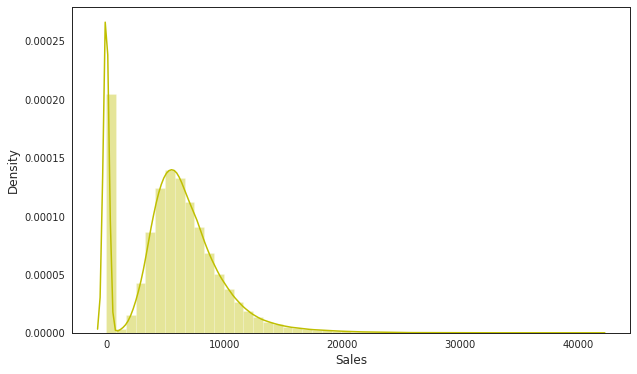

In [31]:
# Dependent variable price
plt.figure(figsize= (10,6))
sns.distplot(merged_ds['Sales'],color= 'y')

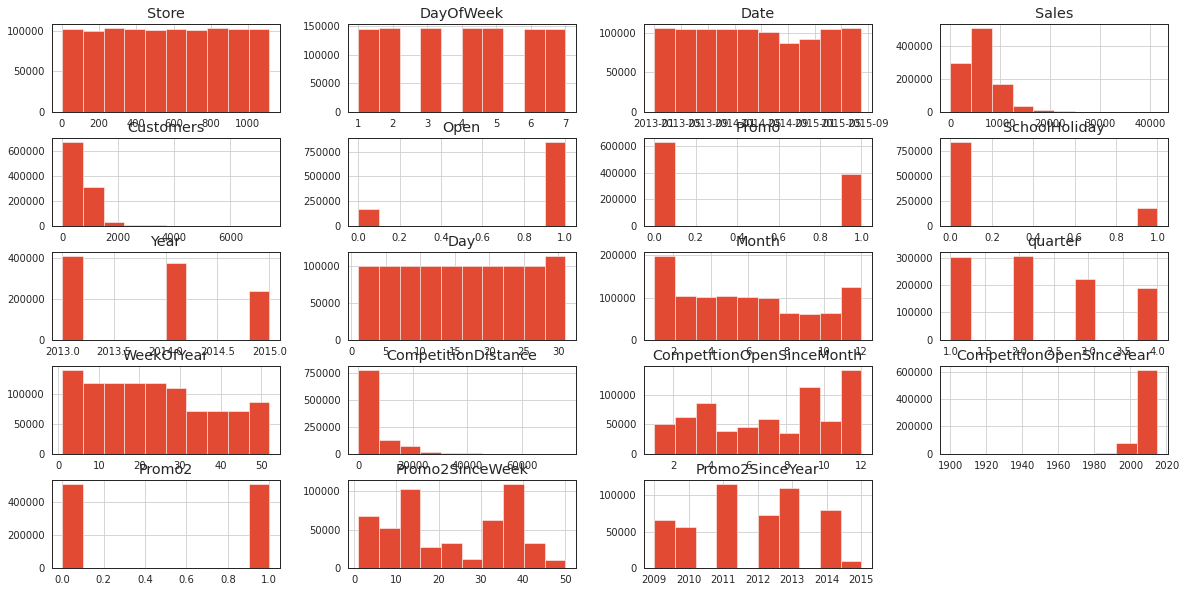

In [32]:
merged_ds.hist(figsize =(20,10))
plt.show()

In [33]:
numerical_features = merged_ds.describe()


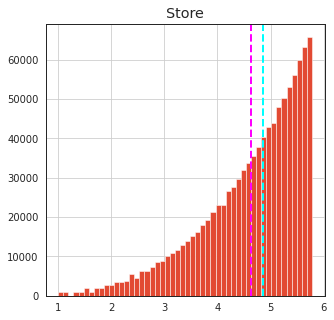

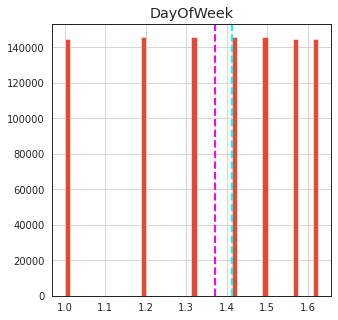

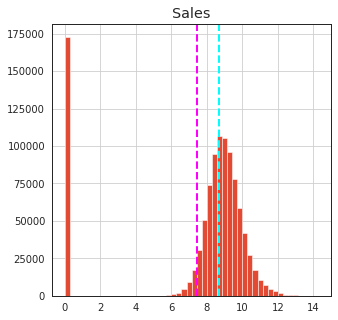

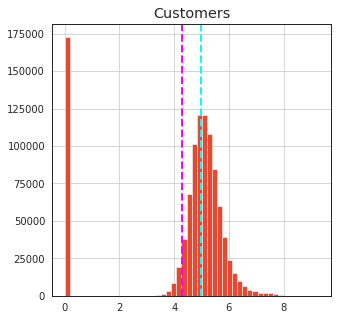

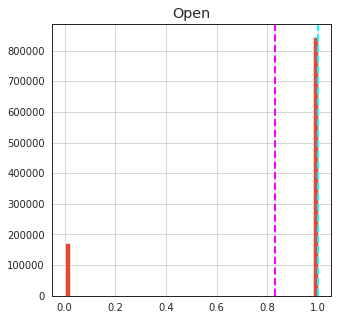

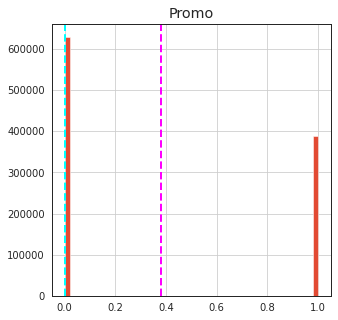

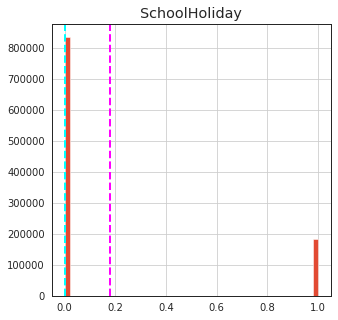

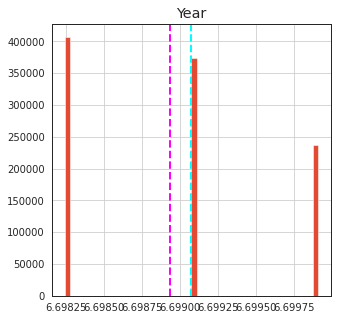

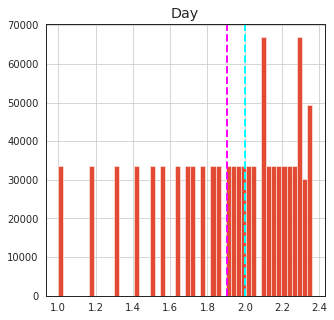

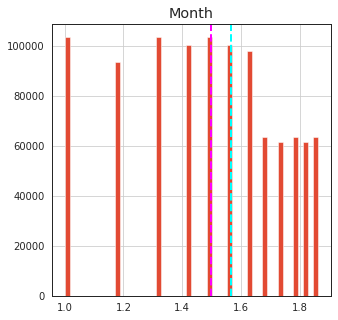

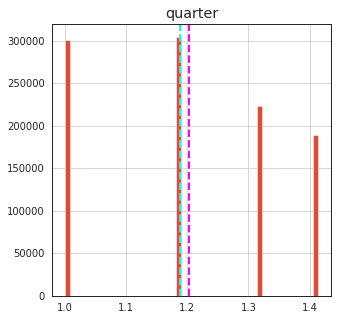

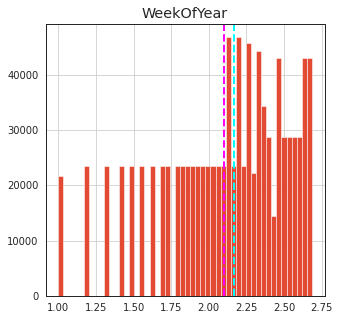

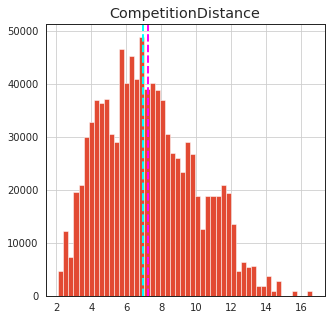

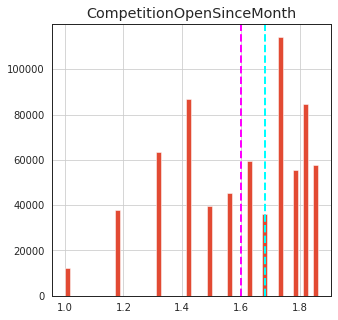

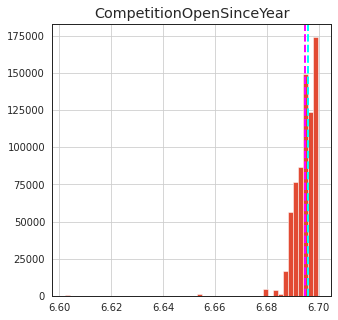

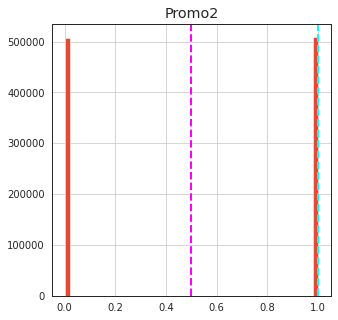

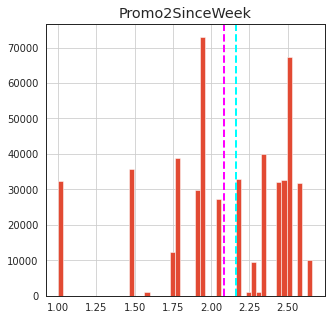

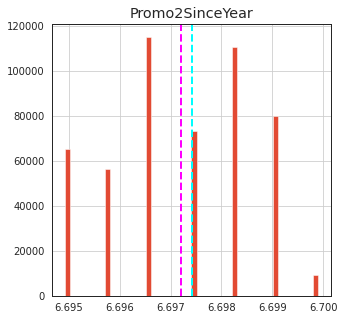

In [34]:
#For Left Skewed data....
#Plot a bar plot for each numerical feature  count
for col in numerical_features:
  fig = plt.figure(figsize = (5,5))
  ax = fig.gca()
  features = np.sqrt(np.sqrt(merged_ds[col]))
  features.hist(bins=50,ax=ax)
  ax.axvline(features.mean(),color = 'magenta',linestyle = 'dashed',linewidth =2)
  ax.axvline(features.median(),color ='cyan',linestyle = 'dashed',linewidth =2)
  ax.set_title(col)
plt.show()

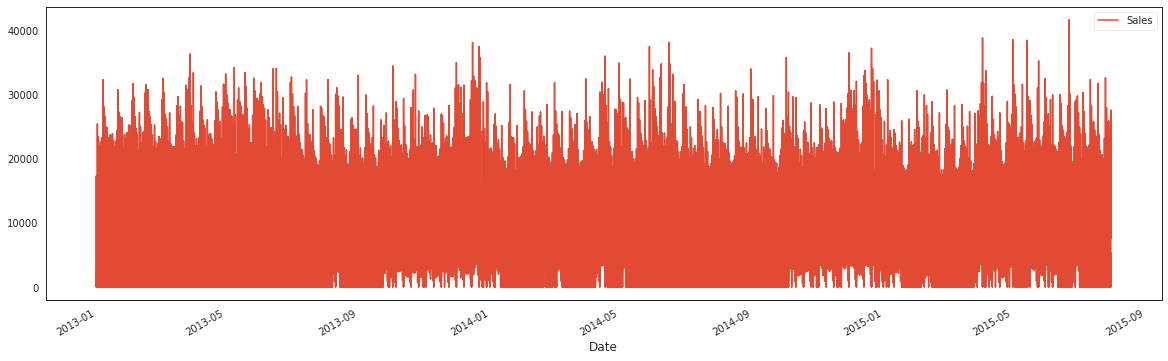

In [35]:
#creating  timeseries 
from datetime import datetime

df = pd.DataFrame(merged_ds ,columns = ['Date','Sales'])
# Set the Date as Index
df['Date'] = pd.to_datetime(merged_ds['Date'])
df.index =df ['Date']
del df['Date']

df.plot(figsize=(20,6))
plt.show()

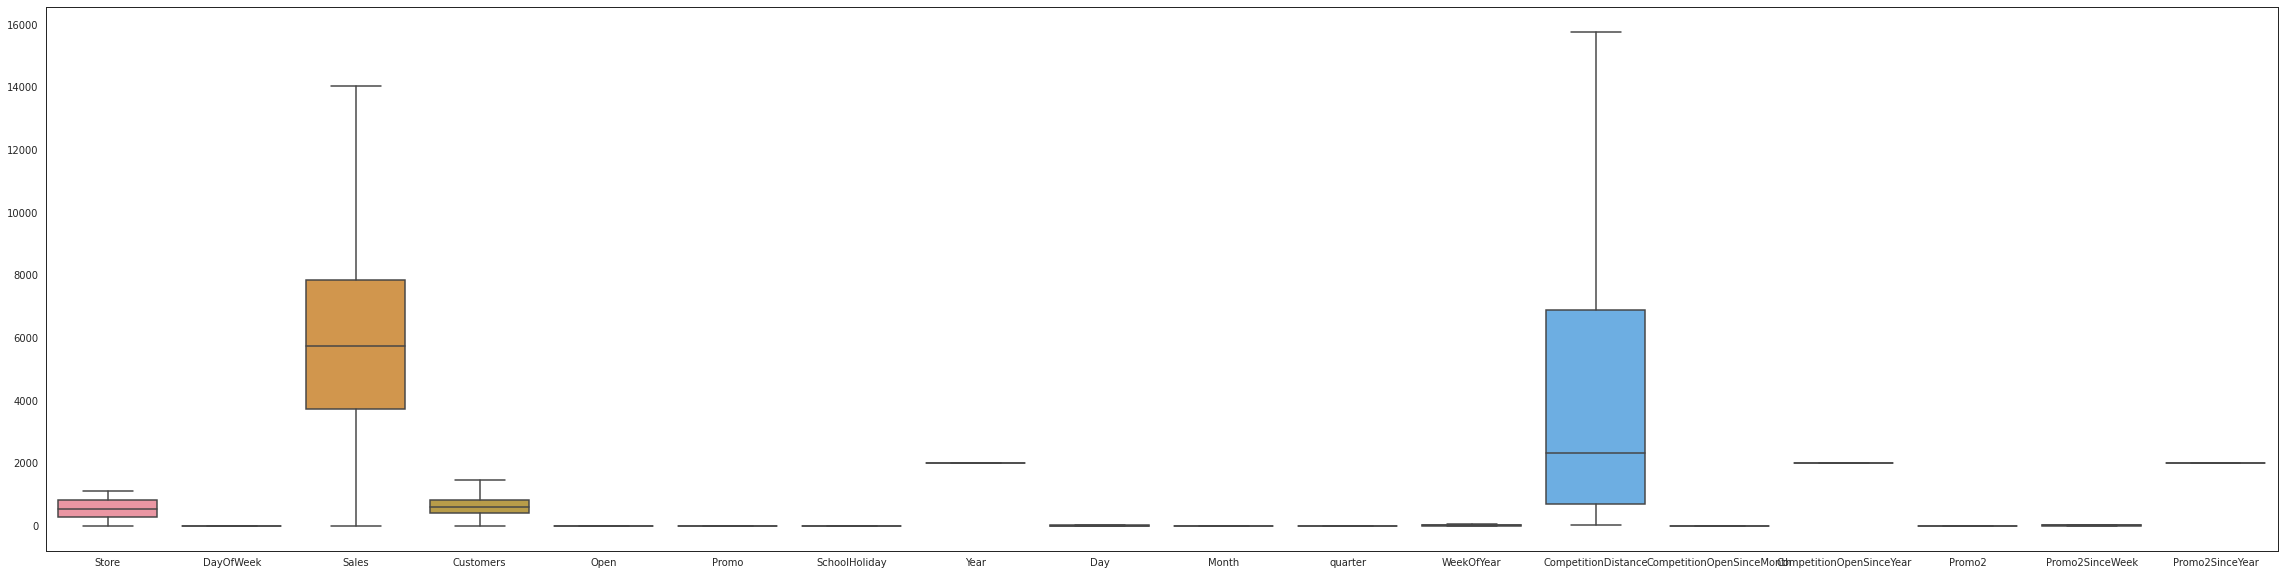

In [36]:
#ploting box plot to find any outliers
plt.figure(figsize= (40,10))
sns.boxplot(data = merged_ds,showfliers=False)

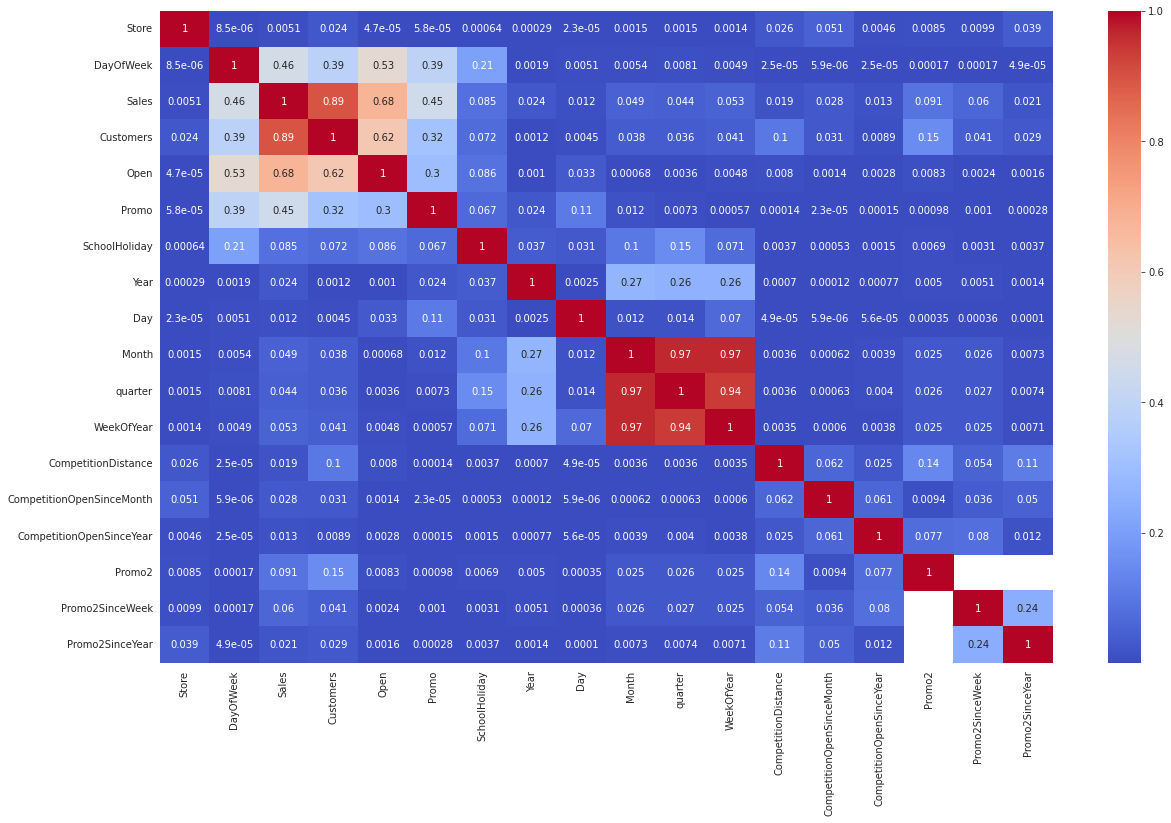

In [37]:
plt.subplots(figsize=(20,12))
sns.heatmap(merged_ds.corr().abs(), annot=True,cmap= 'coolwarm')
plt.savefig("heatmap.png")

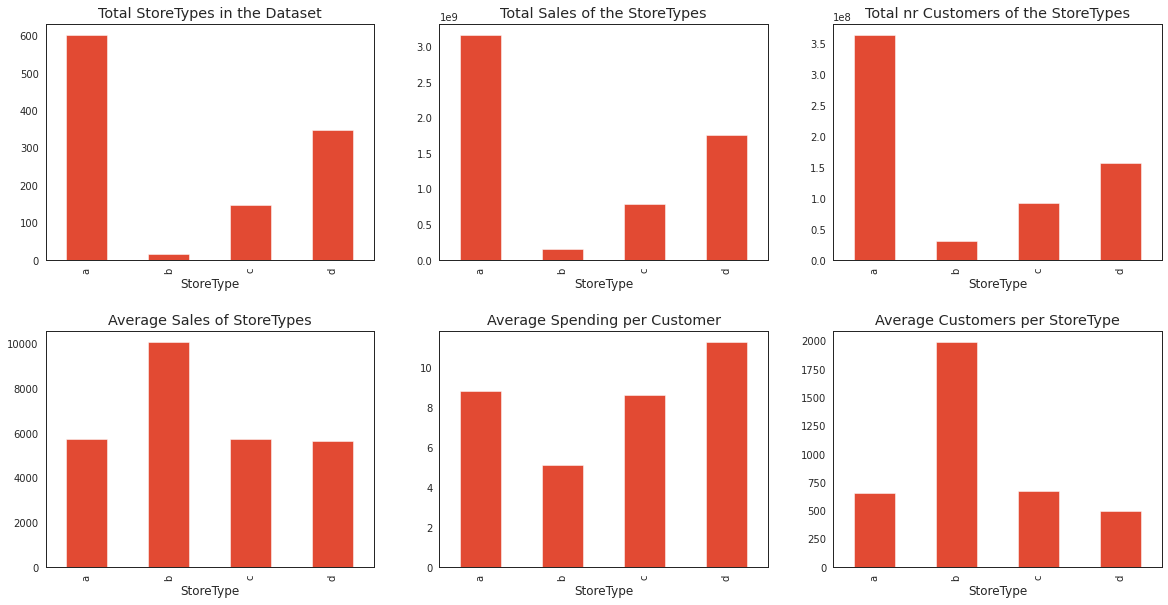

In [38]:
merged_ds["Avg_Customer_Sales"] = merged_ds.Sales/merged_ds.Customers


     

f, ax = plt.subplots(2, 3, figsize = (20,10))

store_ds.groupby("StoreType")["Store"].count().plot(kind = "bar", ax = ax[0, 0], title = "Total StoreTypes in the Dataset")
merged_ds.groupby("StoreType")["Sales"].sum().plot(kind = "bar", ax = ax[0,1], title = "Total Sales of the StoreTypes")
merged_ds.groupby("StoreType")["Customers"].sum().plot(kind = "bar", ax = ax[0,2], title = "Total nr Customers of the StoreTypes")
merged_ds.groupby("StoreType")["Sales"].mean().plot(kind = "bar", ax = ax[1,0], title = "Average Sales of StoreTypes")
merged_ds.groupby("StoreType")["Avg_Customer_Sales"].mean().plot(kind = "bar", ax = ax[1,1], title = "Average Spending per Customer")
merged_ds.groupby("StoreType")["Customers"].mean().plot(kind = "bar", ax = ax[1,2], title = "Average Customers per StoreType")

plt.subplots_adjust(hspace = 0.3)
plt.show()



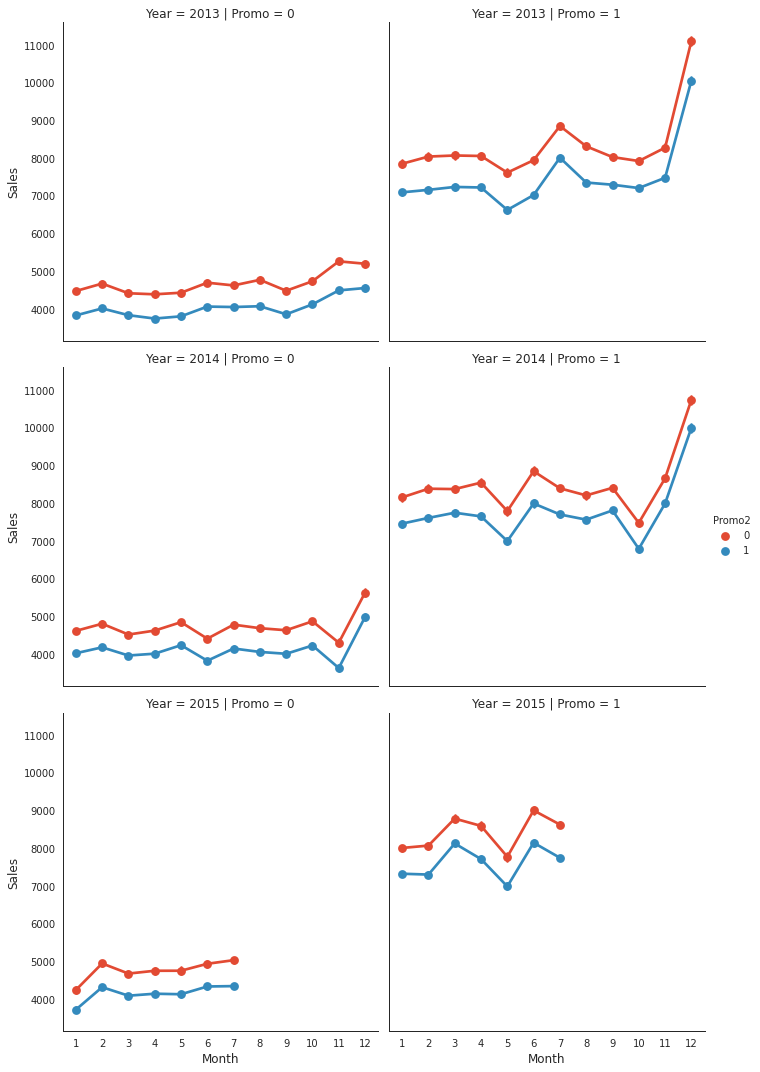

In [39]:
sns.factorplot(data = merged_ds, x ="Month", y = "Sales", 
               col = 'Promo', # per store type in cols
               hue = 'Promo2',
               row = "Year"
             )

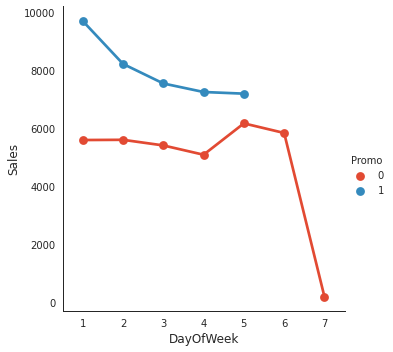

In [40]:
sns.factorplot(data = merged_ds, x = "DayOfWeek", y = "Sales", hue = "Promo")


### Understanding catagorical **features**

In [41]:
#FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
merged_ds["Season"] = np.where(merged_ds["Month"].isin([3,4,5]),"Spring",
                      np.where(merged_ds["Month"].isin([6,7,8]),"Summer",
                      np.where(merged_ds["Month"].isin([9,10,11]), "Fall",
                      np.where(merged_ds["Month"].isin([12,1,2]),"Winter","None"))))
merged_ds.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Avg_Customer_Sales,Season
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,...,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,9.482883,Summer
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,...,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",9.702400,Summer
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,...,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",10.126675,Summer
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,...,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,9.342457,Summer
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,...,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,8.626118,Summer


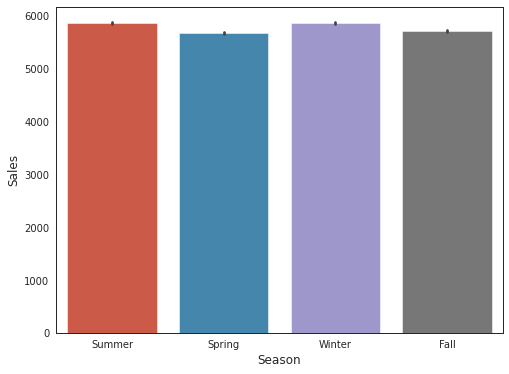

In [42]:
#ploting barplot of season with respective sales 
ax = sns.barplot(x ='Season',y='Sales',data = merged_ds)


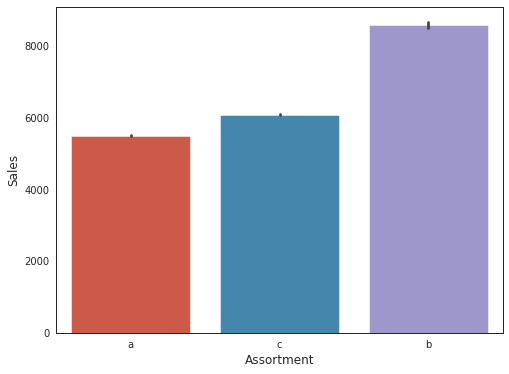

In [43]:
#Create the bar plot for Average Sales across different Assortments
ax = sns.barplot(x="Assortment", y="Sales", data = merged_ds)

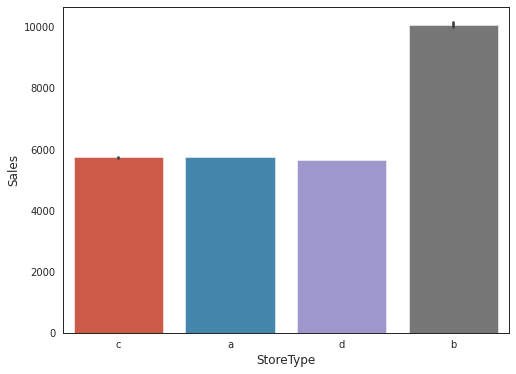

In [44]:
#Create the bar plot for Average Sales across different Store Types
ax =sns.barplot(x= 'StoreType',y = 'Sales',data = merged_ds)

In [45]:
print("""So, no promotion in the weekend. However, the sales are very high, if the stores have promotion. 
The Sales are going crazy on Sunday. No wonder.""")
print("There are", merged_ds[(merged_ds.Open == 1) & (merged_ds.DayOfWeek == 7)].Store.unique().shape[0], "stores opened on sundays")    


So, no promotion in the weekend. However, the sales are very high, if the stores have promotion. 
The Sales are going crazy on Sunday. No wonder.
There are 33 stores opened on sundays


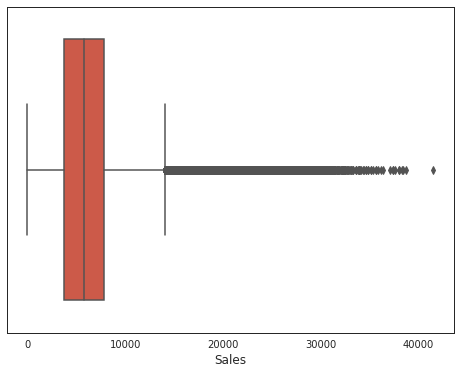

In [46]:
#checking outliers in sales
sns.boxplot(merged_ds['Sales'])



## Data cleaning
Let's try to remove outlier(Unwanted or Extra which makes our dataset quiet unwell) from our dataset.

In [47]:
#removing outliers
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [48]:
# defining new variable after removing outliers
merged_ds = remove_outlier(merged_ds, 'Sales')

In [49]:
# where stores are closed, they won't generate sales, so we will remove that part of the dataset
merged_ds = merged_ds[merged_ds.Open != 0]


In [50]:
# Open isn't a variable anymore, so we'll drop it too
merged_ds = merged_ds.drop('Open', axis=1)


In [51]:
# Check if there's any opened store with zero sales
merged_ds[merged_ds.Sales == 0]['Store'].sum()


31460

In [52]:
# see the percentage of open stored with zero sales
df[df.Sales == 0]['Sales'].sum()/df.Sales.sum()


0.0

In [53]:
# remove this part of data to avoid bias
merged_ds = merged_ds[merged_ds.Sales != 0]


In [54]:
ds_new = merged_ds.copy()

### Missing Values


In [55]:
for i in ds_new.columns:
    print("Missing values in ",i, "is -",  "    "  ,ds_new[i].isnull().sum()/ds_new.shape[0] * 100)

Missing values in  Store is -      0.0
Missing values in  DayOfWeek is -      0.0
Missing values in  Date is -      0.0
Missing values in  Sales is -      0.0
Missing values in  Customers is -      0.0
Missing values in  Promo is -      0.0
Missing values in  StateHoliday is -      0.0
Missing values in  SchoolHoliday is -      0.0
Missing values in  Year is -      0.0
Missing values in  Day is -      0.0
Missing values in  Month is -      0.0
Missing values in  quarter is -      0.0
Missing values in  WeekOfYear is -      0.0
Missing values in  StoreType is -      0.0
Missing values in  Assortment is -      0.0
Missing values in  CompetitionDistance is -      0.26490746584087943
Missing values in  CompetitionOpenSinceMonth is -      31.87560845551365
Missing values in  CompetitionOpenSinceYear is -      31.87560845551365
Missing values in  Promo2 is -      0.0
Missing values in  Promo2SinceWeek is -      49.39753731452809
Missing values in  Promo2SinceYear is -      49.39753731452809


In [56]:
#replacing null values with mean value 
ds_new['CompetitionOpenSinceMonth'].fillna(int(ds_new['CompetitionOpenSinceMonth'].mean()),inplace =True)
ds_new['CompetitionOpenSinceYear'].fillna(int(ds_new['CompetitionOpenSinceYear'].mean()),inplace= True)
ds_new['CompetitionDistance'].fillna(int(ds_new['CompetitionDistance'].mean()),inplace =True)

In [57]:
# Removing unwated  values columns  in store dataset
ds_new.drop(columns=['Promo2SinceWeek','Promo2SinceYear','PromoInterval','Date'],axis= 1, inplace=True)


### Multicollinearity

In [58]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [59]:
calc_vif(ds_new[[i for i in ds_new.describe().columns if i not in ['Year','Sales']]])


,variables,VIF
0,Store,4.004919
1,DayOfWeek,5.850688
2,Customers,8.369736
3,Promo,2.340447
4,SchoolHoliday,1.378135
5,Day,4.609304
6,Month,109.403710
7,quarter,94.089922
8,WeekOfYear,51.286814
9,CompetitionDistance,1.655880


## **Feature Engineering**

---
Feature engineering is the process of using domain knowledge to extract features from raw data via data mining techniques. These features can be used to improve the performance of machine learning algorithms. Feature engineering can be considered as applied machine learning itself.




We shall convert categorical features to numeric type...

In [60]:
#creating one hot encodind 
ds_new = pd.get_dummies(ds_new,columns=['StoreType','Assortment','StateHoliday'])


In [61]:
ds_new.head()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,Year,Day,Month,quarter,...,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,StateHoliday_0,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,5,5263,555,1,1,2015,31,7,3,...,1,0,1,0,0,0,1,0,0,0
1,2,5,6064,625,1,1,2015,31,7,3,...,0,0,1,0,0,0,1,0,0,0
2,3,5,8314,821,1,1,2015,31,7,3,...,0,0,1,0,0,0,1,0,0,0
3,4,5,13995,1498,1,1,2015,31,7,3,...,1,0,0,0,1,0,1,0,0,0
4,5,5,4822,559,1,1,2015,31,7,3,...,0,0,1,0,0,0,1,0,0,0


## Setting Features and Target Variables

In [62]:
from scipy.stats import zscore
x_df= ds_new.drop(['Sales','Store','Year','Season'] , axis = 1)
X = x_df.apply(zscore)
Y =np.log10( ds_new.Sales)


In [64]:
X.shape

(817644, 25)

Splitting Dataset Into Training Set and Test Set


In [68]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)


In [70]:
columns=X_train.columns
columns

Index(['DayOfWeek', 'Customers', 'Promo', 'SchoolHoliday', 'Day', 'Month',
       'quarter', 'WeekOfYear', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Avg_Customer_Sales', 'StoreType_a', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_a', 'Assortment_b', 'Assortment_c',
       'StateHoliday_0', 'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b',
       'StateHoliday_c'],
      dtype='object')

#**Implementing Supervised Machine Learning algorithms**


## **Implementing Linear Regression**

---
Let's now begin to train out regression model! We will need to first split up our data into an train array that contains the part of dataset used for training data, and a test array used for test data.

In [71]:
linear_reg = LinearRegression().fit(X_train,Y_train)

In [72]:
linear_reg.score(X_train,Y_train)

0.9003175357655178

In [73]:
linear_reg.coef_

array([-2.74176454e-03,  1.69007648e-01,  9.50227063e-03,  1.15403529e-03,
       -3.09549954e-04,  9.99699713e-04, -2.54089619e-03,  2.53238163e-03,
       -1.66045926e-04,  7.15712041e-04,  7.25654157e-04, -4.18458533e-03,
        9.33037591e-02, -2.26309475e+11, -5.51680157e+10, -1.54909936e+11,
       -2.10287315e+11,  2.97626861e+10,  5.63014019e+09,  2.97240890e+10,
       -1.51169392e+11, -1.51617813e+11, -1.20183419e+10, -5.15178120e+09,
       -3.80495892e+09])

In [74]:
y_pred = linear_reg.predict(X_test)

In [75]:
y_pred

array([3.96456724, 3.71652036, 3.95449644, ..., 3.73724072, 3.79464429,
       3.62839215])

###**Regression Evaluation Metrics**

---


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error (MAE)** is the mean of the absolute value of the errors:

1n∑i=1n|yi−y^i| 
 
**Mean Squared Error (MSE)** is the mean of the squared errors:

1n∑i=1n(yi−y^i)2
 
Root Mean Squared Error (RMSE) **bold text** is the square root of the mean of the squared errors:

1n∑i=√1n(yi−y^i)2
 
Comparing these metrics:

MAE is the easiest to understand, because it's the average error.
<br>MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
<br>RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
<br>All of these are loss functions, because we want to minimize them.

In [76]:
MSE  = mean_squared_error(10**(Y_test),10**(y_pred))
print("MSE :" , MSE)

MAE=mean_absolute_error(10**(Y_test),10**(y_pred))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 1727784.4640635478
MAE : 544.5934411228363
RMSE : 1314.452153584735


In [77]:
r2 =r2_score(10**(Y_test),10**(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((Y_test),(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))


R2 : 0.7171821674257164
Adjusted R2 :  0.9011475599161949


Text(0, 0.5, 'Predicted Sales price')

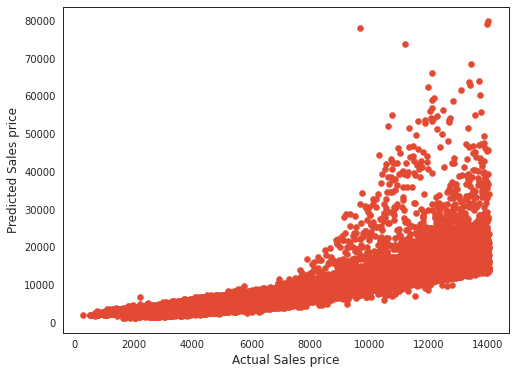

In [78]:
plt.scatter(10**(Y_test),10**(y_pred))
plt.xlabel('Actual Sales price')
plt.ylabel('Predicted Sales price')

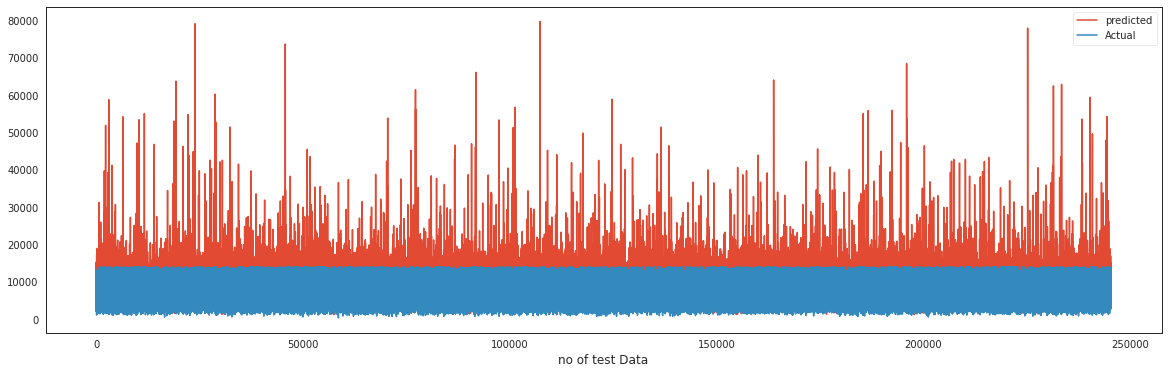

In [79]:
plt.figure(figsize=(20,6))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(Y_test)))
plt.legend(['predicted','Actual'])
plt.xlabel('no of test Data')
plt.show()

###**Residuals:**

---
A residual is the vertical distance between a data point and the regression line. Each data point has one residual. They are positive if they are above the regression line and negative if they are below the regression line

Text(0.5, 0.98, 'Residual Analysis')

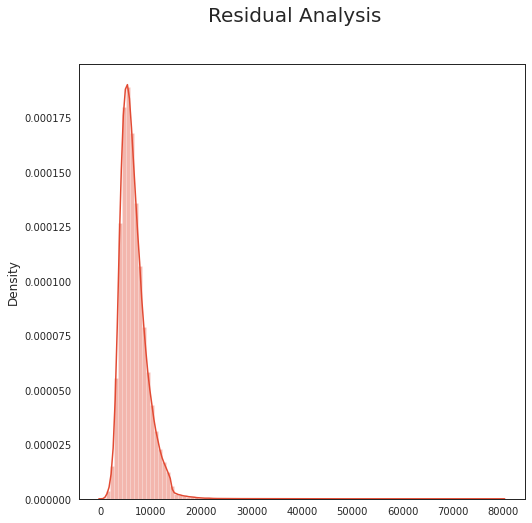

In [80]:
fig = plt.figure(figsize =(8,8))
sns.distplot((10**(Y_test),10**(y_pred)),bins =100)
#plot label
fig.suptitle("Residual Analysis",fontsize = 20)

Text(0, 0.5, 'residuals')

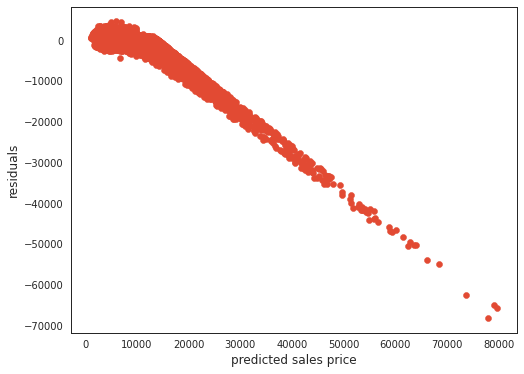

In [81]:
### Heteroscadacity
plt.scatter(10**(y_pred),10**(Y_test)-10**(y_pred))
plt.xlabel("predicted sales price")
plt.ylabel('residuals')

### **Linear regression model from statsmodels.api.**

In [82]:
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
model = sm.OLS(Y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

In [83]:
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                 3.366e+05
Date:                Sun, 11 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:01:50   Log-Likelihood:             1.2319e+06
No. Observations:              817644   AIC:                        -2.464e+06
Df Residuals:                  817621   BIC:                        -2.463e+06
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         3.7894   5.93e-05   6.39e+04      0.000       3.789       3.790
DayOfWeek                    -0.0029   6.26e-05    -45.518      0.000      -0.003      -0.003
Customers                     0.1691   7.33e-05   2308.231      0.000       0.169       0.169
Promo                         0.0094   6.91e-05    136.269      0.000       0.009       0.010
SchoolHoliday                 0.0012    6.3e-05     19.405      0.000       0.001       0.001
Day                          -0.0004    6.1e-05     -6.501      0.000      -0.001      -0.000
Month                         0.0007      0.000      2.424      0.015       0.000       0.001
quarter                      -0.0026      0.000    -10.675      0.000      -0.003      -0.002
WeekOfYear                    0.0028      0.000     12.757      0.000       0.002       0.003
CompetitionDistance       -9.093e-05    6.3e-05     -1.443      0.149      -0.000    3.25e-05
CompetitionOpenSinceMonth     0.0008   5.96e-05     12.944      0.000       0.001       0.001
CompetitionOpenSinceYear      0.0007   5.97e-05     11.440      0.000       0.001       0.001
Promo2                       -0.0042   6.33e-05    -66.356      0.000      -0.004      -0.004
Avg_Customer_Sales            0.0935   8.42e-05   1110.307      0.000       0.093       0.094
StoreType_a                   0.0014   3.84e-05     36.666      0.000       0.001       0.001
StoreType_b                  -0.0131    9.4e-05   -138.917      0.000      -0.013      -0.013
StoreType_c                   0.0022   4.99e-05     44.448      0.000       0.002       0.002
StoreType_d                   0.0003   4.86e-05      5.641      0.000       0.000       0.000
Assortment_a                  0.0004    3.2e-05     14.017      0.000       0.000       0.001
Assortment_b                 -0.0220    9.3e-05   -236.130      0.000      -0.022      -0.022
Assortment_c                  0.0037   3.31e-05    112.130      0.000       0.004       0.004
StateHoliday_0               -0.0002   3.04e-05     -6.803      0.000      -0.000      -0.000
StateHoliday_0                0.0002   3.02e-05      6.957      0.000       0.000       0.000
StateHoliday_a               -0.0002   5.93e-05     -2.912      0.004      -0.000   -5.65e-05
StateHoliday_b               -0.0004   5.94e-05     -6.392      0.000      -0.000      -0.000
StateHoliday_c                0.0009   5.94e-05     15.456      0.000       0.001       0.001
==============================================================================
Omnibus:                   544112.113   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         16336654.239
Skew:                          -2.776   Prob(JB):                         0.00
Kurtosis:                      24.183   C

## **Implementing Lasso regression**

---
Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters).

In [84]:
lasso = Lasso(alpha = 0.005,max_iter =3000)
lasso.fit(X_train,Y_train)

Lasso(alpha=0.005, max_iter=3000)

In [85]:
lasso.score(X_train,Y_train)

0.8944693122478585

In [86]:
y_pred_1 = lasso.predict(X_test)

In [87]:
MSE = mean_squared_error(10**(Y_test),10**(y_pred_1))
print('MSE :' ,MSE )

MAE=mean_absolute_error(10**(Y_test), 10**(y_pred_1))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(Y_test), 10**(y_pred_1))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(Y_test), 10**(y_pred_1)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 1731341.857751232
MAE : 567.6317438477369
RMSE : 1315.804642700136
R2 : 0.7165998642546381
Adjusted R2 :  0.7165709774720426


Text(0, 0.5, 'predicted selling price')

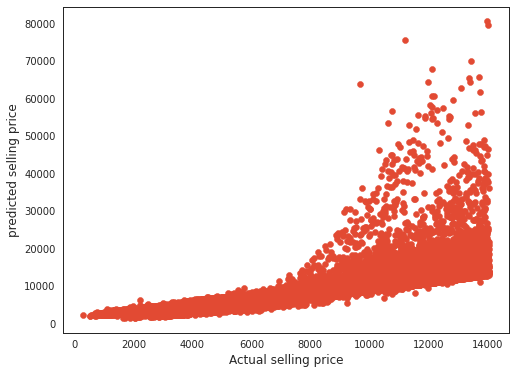

In [88]:
plt.scatter(10**(Y_test),10**(y_pred_1))
plt.xlabel('Actual selling price')
plt.ylabel('predicted selling price')

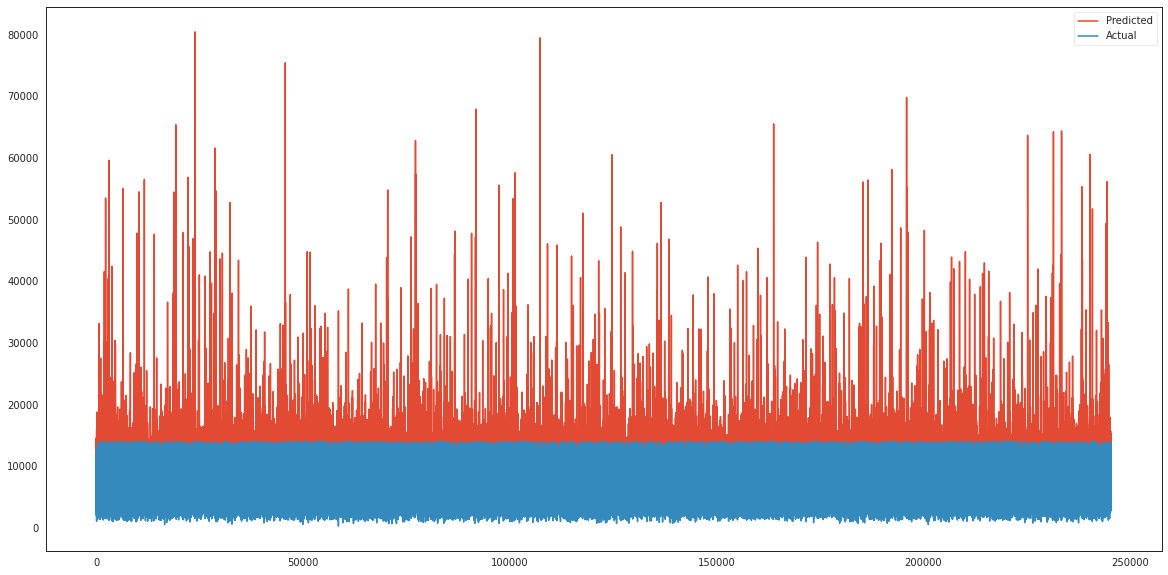

In [114]:
plt.figure(figsize =(20,10))
plt.plot(10**(y_pred_1))
plt.plot(np.array(10**(Y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

### Implementing Cross - Validation procedure for lasso
---

In [96]:
from sklearn.model_selection import GridSearchCV

# cross validation 
lasso =  Lasso()
parameters  = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,50,55,60,100]}
lasso_regressor = GridSearchCV (lasso ,parameters,scoring = 'neg_mean_squared_error', cv= 4)
lasso_regressor.fit(X_train,Y_train)

GridSearchCV(cv=4, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 0.0001, 0.001,
                                   0.01, 0.1, 1, 5, 10, 20, 30, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [97]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_) 

The best fit alpha value is found out to be : {'alpha': 1e-08}

Using  {'alpha': 1e-08}  the negative mean squared error is:  -0.0028780802775069843


In [98]:
#lasso_predict Vairable
y_pred_lasso = lasso_regressor.predict(X_test)

In [100]:
MSE = mean_squared_error(10**(Y_test),10**(y_pred_lasso))
print('MSE :' ,MSE)

MAE = mean_absolute_error(10**(Y_test),10**(y_pred_lasso))
print('MAE :' , MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" , RMSE)

r2 = r2_score(10**(Y_test),10**(y_pred_lasso))
print("r2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(Y_test), 10**(y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 1724232.6672110662
MAE : 544.1903747737128
RMSE : 1313.1004025629823
r2 : 0.717763554461227
Adjusted R2 :  0.7177347862927808


Text(0, 0.5, 'predicted selling price')

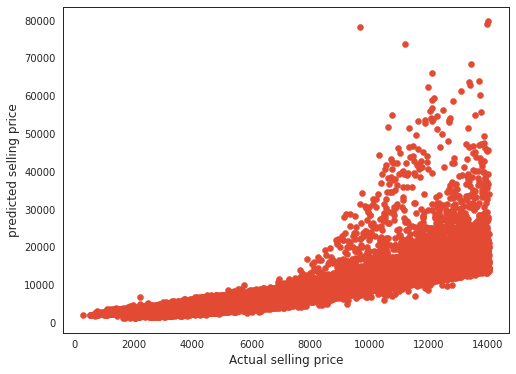

In [115]:
plt.scatter(10**(Y_test),10**(y_pred_lasso))
plt.xlabel("Actual selling price")
plt.ylabel("predicted selling price")

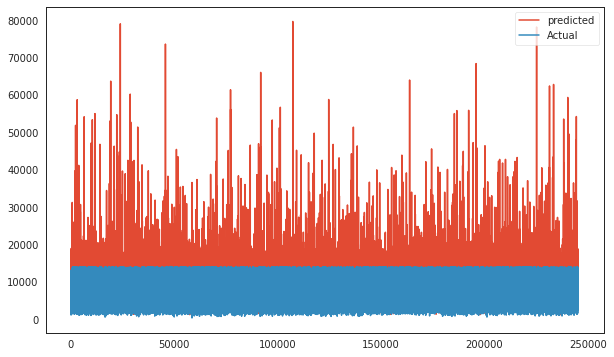

In [116]:
plt.figure(figsize = (10,6))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(np.array(Y_test)))
plt.legend(["predicted",'Actual'])
plt.show()

Text(0.5, 0.98, 'Residual Analysis')

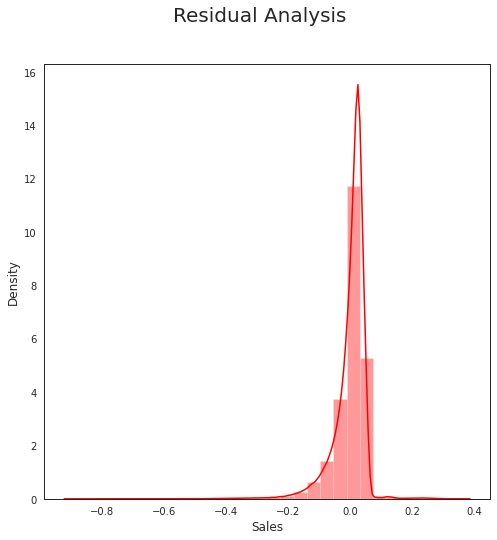

In [117]:
#Resuldual Analysis
fig = plt.figure(figsize =(8,8))
sns.distplot(((Y_test)- (y_pred_lasso)),bins = 30,color = 'r')
#plot label
fig.suptitle("Residual Analysis",fontsize = 20)

Text(0, 0.5, 'residuals')

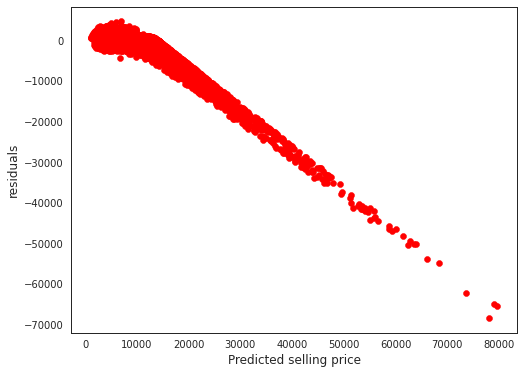

In [119]:
# hetrosacadaicty
plt.scatter(10**(y_pred_lasso),10**(Y_test)-10**(y_pred_lasso),c= 'r')
plt.xlabel('Predicted selling price')
plt.ylabel('residuals')

## **Implementing Ridge Regression**
---
Ridge regression is a way to create a parsimonious model when the number of predictor variables in a set exceeds the number of observations, or when a data set has multicollinearity (correlations between predictor variables).

In [120]:
ridge = Ridge(alpha = 0.1)
ridge.fit(X_train,Y_train)

Ridge(alpha=0.1)

In [123]:
ridge.score(X_train,Y_train)

0.9003226963457778

In [124]:
y_pred_r = ridge.predict(X_test)

In [ ]:
#Regression Evaluation Metrics 


In [127]:

#Regression Evaluation Metrics 
MSE  = mean_squared_error(10**(Y_test), 10**(y_pred_r))
print("MSE :" , MSE)

MAE=mean_absolute_error(10**(Y_test), 10**(y_pred_r))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(Y_test), 10**(y_pred_r))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(Y_test), 10**(y_pred_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 1724230.6097785286
MAE : 544.1903463123855
RMSE : 1313.0996191373024
R2 : 0.7177638912385409
Adjusted R2 :  0.7177351231044221


Text(0, 0.5, 'Predicted selling price')

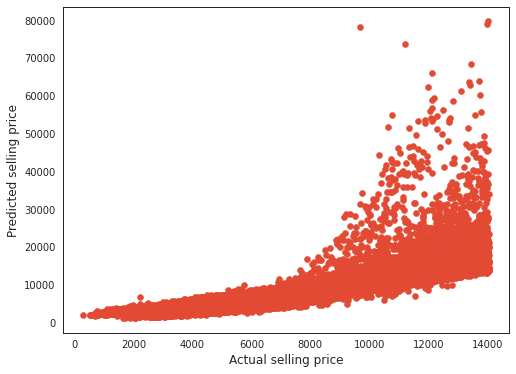

In [126]:
plt.scatter(10**(Y_test), 10**(y_pred_r))
plt.xlabel('Actual selling price')
plt.ylabel('Predicted selling price')

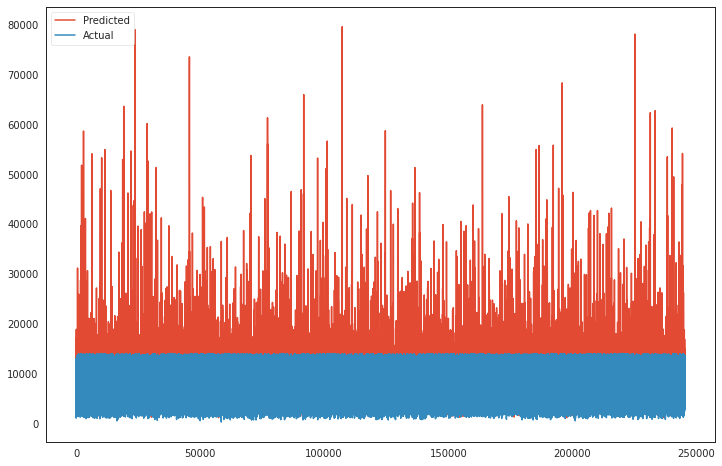

In [128]:
plt.figure(figsize=(12,8))
plt.plot(10**(y_pred_r))
plt.plot(10**(np.array(Y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0.98, 'Residual Analysis')

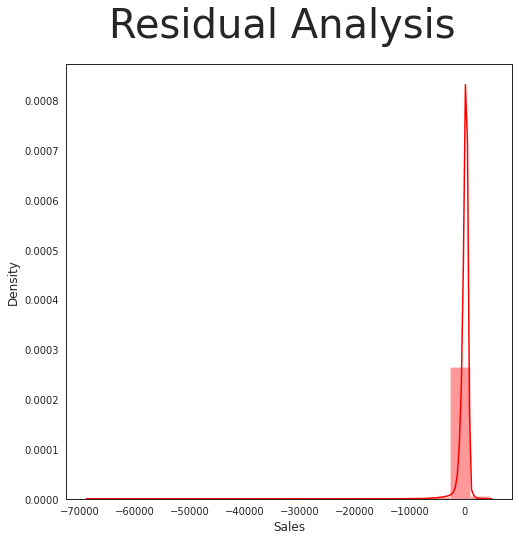

In [130]:
#Resuldual Analysis
fig=plt.figure(figsize=(8,8))
  
sns.distplot((10**(Y_test)- 10**(y_pred_r)),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 40)   

Text(0, 0.5, 'residuals')

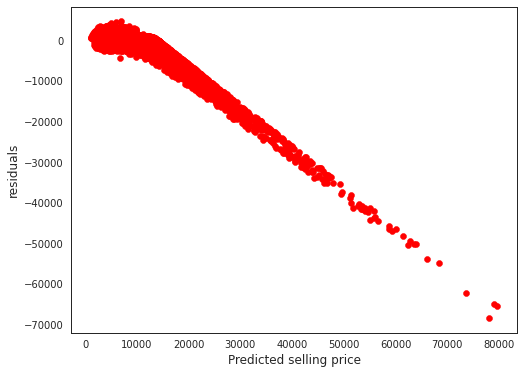

In [131]:
### Heteroscadacity
plt.scatter(10**(y_pred_r),10**(Y_test)-10**(y_pred_r),c='r')
plt.xlabel('Predicted selling price')
plt.ylabel('residuals')

### Running Grid Search Cross Validation for Ridge Regression

---

In [132]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [133]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 20}

Using  {'alpha': 20}  the negative mean squared error is:  -0.0028782384976498055


In [134]:
#Model Prediction
y_pred_ridge = ridge_regressor.predict(X_test)

In [135]:
##Regression Evaluation Metrics 
MSE  = mean_squared_error(10**(Y_test), 10**(y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(Y_test), 10**(y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(Y_test), 10**(y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 1723812.6800382049
RMSE : 1312.9404708661414
R2 : 0.7178323013821585
Adjusted R2 :  0.717803540221039


Text(0, 0.5, 'Predicted selling price')

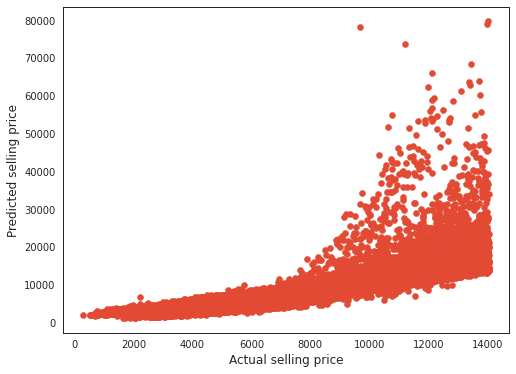

In [136]:
#ploting a scatter plot
plt.scatter(10**(Y_test), 10**(y_pred_ridge))
plt.xlabel('Actual selling price')
plt.ylabel('Predicted selling price')

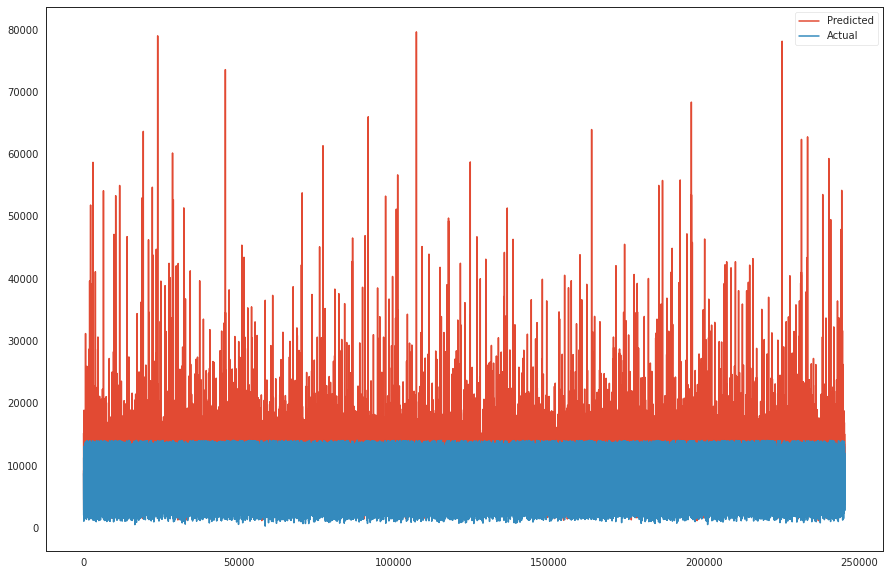

In [143]:
plt.figure(figsize=(15,10))
plt.plot(10**(y_pred_ridge))
plt.plot(10**(np.array(Y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0.98, 'Residual Analysis')

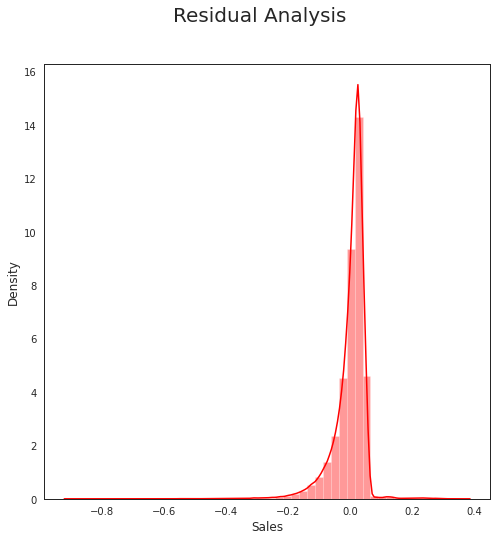

In [141]:
#Resuldual Analysis
fig=plt.figure(figsize=(8,8))
  
sns.distplot(((Y_test)-(y_pred_ridge)),bins=50,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)   

Text(0, 0.5, 'residuals')

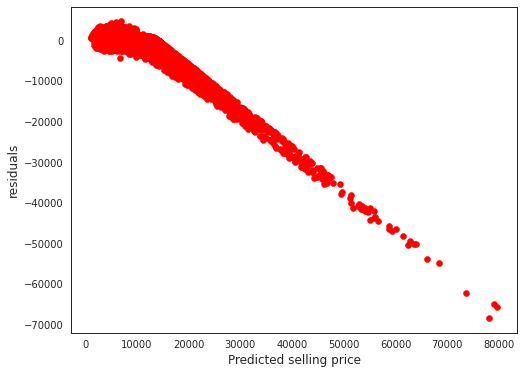

In [148]:
### Heteroscadacity
plt.scatter(10**(y_pred_ridge),10**(Y_test)-10**(y_pred_ridge),c='r')
plt.xlabel('Predicted selling price')
plt.ylabel('residuals')